In [1]:
# Standard setup to import from the src package
import sys
import os
from pathlib import Path
import importlib
import src.data_collection
importlib.reload(src.data_collection)
from src.data_collection import fetch_stock_data

# Find the project root directory (where src/ is located)
project_root = Path(os.getcwd()).parent  # Assumes notebook is in notebooks/
sys.path.append(str(project_root))

# Now import your modules
from src.data_collection import fetch_stock_data, fetch_fama_french_factors
from src.fed_analysis import identify_fed_regimes
from src.factor_modeling import estimate_factor_exposures
from src.optimization import backtest_regime_strategies
from src.visualization import create_interactive_regime_dashboard

# Also import external libraries you'll need
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Now you're ready to use your custom modules
stock_data = fetch_stock_data(['SPY', 'QQQ'], '2020-01-01', '2023-01-01')

2025-03-06 08:59:44,558 - src.data_collection - INFO - Fetching stock data for 2 tickers from 2020-01-01 to 2023-01-01


YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  2 of 2 completed
2025-03-06 08:59:44,910 - src.data_collection - INFO - Raw stock data saved to /Users/gabescott/GitHub-Portfolio-Project/FF-FedTiming-Portfolio-Optimizer/data/raw/stock_prices_2020-01-01_to_2023-01-01.csv


Data columns: MultiIndex([( 'Close', 'QQQ'),
            ( 'Close', 'SPY'),
            (  'High', 'QQQ'),
            (  'High', 'SPY'),
            (   'Low', 'QQQ'),
            (   'Low', 'SPY'),
            (  'Open', 'QQQ'),
            (  'Open', 'SPY'),
            ('Volume', 'QQQ'),
            ('Volume', 'SPY')],
           names=['Price', 'Ticker'])
Column levels: [['Close', 'High', 'Low', 'Open', 'Volume'], ['QQQ', 'SPY']]
Level 0 values: ['Close', 'High', 'Low', 'Open', 'Volume']
Level 1 values: ['QQQ', 'SPY']


2025-03-06 08:59:52,126 - src.data_collection - INFO - Fetching stock data for 5 tickers from 2010-01-01 to 2023-12-31
[*********************100%***********************]  5 of 5 completed
2025-03-06 08:59:52,422 - src.data_collection - INFO - Raw stock data saved to /Users/gabescott/GitHub-Portfolio-Project/FF-FedTiming-Portfolio-Optimizer/data/raw/stock_prices_2010-01-01_to_2023-12-31.csv
2025-03-06 08:59:52,422 - src.data_collection - INFO - Fetching Fama-French factors with daily frequency


Data columns: MultiIndex([( 'Close', 'GLD'),
            ( 'Close', 'IWM'),
            ( 'Close', 'QQQ'),
            ( 'Close', 'SPY'),
            ( 'Close', 'TLT'),
            (  'High', 'GLD'),
            (  'High', 'IWM'),
            (  'High', 'QQQ'),
            (  'High', 'SPY'),
            (  'High', 'TLT'),
            (   'Low', 'GLD'),
            (   'Low', 'IWM'),
            (   'Low', 'QQQ'),
            (   'Low', 'SPY'),
            (   'Low', 'TLT'),
            (  'Open', 'GLD'),
            (  'Open', 'IWM'),
            (  'Open', 'QQQ'),
            (  'Open', 'SPY'),
            (  'Open', 'TLT'),
            ('Volume', 'GLD'),
            ('Volume', 'IWM'),
            ('Volume', 'QQQ'),
            ('Volume', 'SPY'),
            ('Volume', 'TLT')],
           names=['Price', 'Ticker'])
Column levels: [['Close', 'High', 'Low', 'Open', 'Volume'], ['GLD', 'IWM', 'QQQ', 'SPY', 'TLT']]
Level 0 values: ['Close', 'High', 'Low', 'Open', 'Volume']
Level 1 values: 

2025-03-06 08:59:53,697 - src.data_collection - INFO - Raw FF factors zip saved to /Users/gabescott/GitHub-Portfolio-Project/FF-FedTiming-Portfolio-Optimizer/data/raw/FF_factors_daily.zip
2025-03-06 08:59:53,824 - src.data_collection - INFO - Processed FF factors saved to /Users/gabescott/GitHub-Portfolio-Project/FF-FedTiming-Portfolio-Optimizer/data/processed/ff_factors_daily.csv
2025-03-06 08:59:53,826 - src.data_collection - INFO - Fetching Fed rate decisions from 2000 to present


Successfully processed Fama-French factors with shape: (25901, 5)


2025-03-06 08:59:54,109 - src.data_collection - INFO - Raw Fed decisions HTML saved to /Users/gabescott/GitHub-Portfolio-Project/FF-FedTiming-Portfolio-Optimizer/data/raw/fed_rate_decisions_page.html
2025-03-06 08:59:54,113 - src.data_collection - INFO - Processed Fed rate decisions saved to /Users/gabescott/GitHub-Portfolio-Project/FF-FedTiming-Portfolio-Optimizer/data/processed/fed_rate_decisions.csv


<Figure size 1200x800 with 0 Axes>

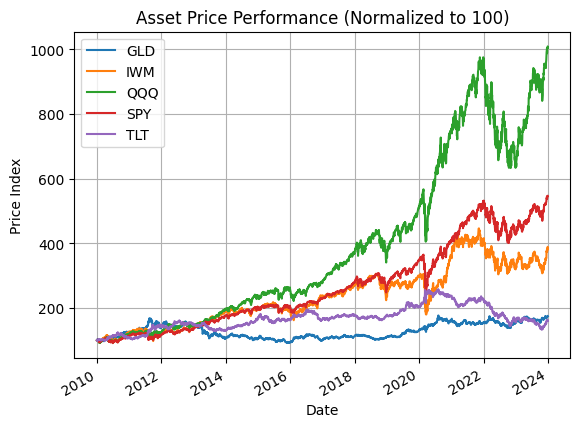

In [2]:
# Load the required modules
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from src.data_collection import fetch_stock_data, fetch_fama_french_factors, fetch_fed_rate_decisions

# Fetch data
tickers = ['SPY', 'QQQ', 'IWM', 'GLD', 'TLT']
stock_data = fetch_stock_data(tickers, '2010-01-01', '2023-12-31')
ff_factors = fetch_fama_french_factors(frequency='daily')
fed_decisions = fetch_fed_rate_decisions()

# Plot asset price trends
plt.figure(figsize=(12, 8))
normalized_prices = stock_data / stock_data.iloc[0] * 100
normalized_prices.plot()
plt.title('Asset Price Performance (Normalized to 100)')
plt.ylabel('Price Index')
plt.legend()
plt.grid(True)
plt.show()